In [1]:
import json
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

from arguments import prepare_finetuning_args, Args
args = prepare_finetuning_args()

# Leggere il file di log
log_file_path = './output/log.txt'


In [2]:
train_epochs = []
train_losses = []
val_epochs = []
val_losses = []
val_accs = []

with open(log_file_path, 'r', encoding="utf-8") as file:
    val_loss_accumulator = []
    val_acc_accumulator = []
    val_epoch = None
    
    for line in file:
        data = json.loads(line)
        epoch = data["epoch"]
        train_loss = data["train_loss"]
        
        # Salviamo i dati per la training loss
        if epoch not in train_epochs:
            train_epochs.append(epoch + 1)
            train_losses.append(train_loss)
        
        # Controlliamo se c'è una validation loss e accuracy
        if "val_loss" in data and "val_acc1" in data:
            #print(line)
            val_epoch = epoch + 1
            val_losses.append(data["val_loss"])
            val_epochs.append(val_epoch)

            val_accs.append(data["val_acc1"])
            
        
        # Ogni 10 epoche, salviamo la media della validation loss e accuracy
        #if val_epoch is not None and val_epoch % args.VAL_FREQ == 0:
            #avg_val_loss = sum(val_loss_accumulator) / len(val_loss_accumulator)
            #avg_val_acc = sum(val_acc_accumulator) / len(val_acc_accumulator)
            #val_epochs.append(val_epoch)
            #val_losses.append(avg_val_loss)
            #val_accs.append(avg_val_acc)
            #val_loss_accumulator = []  # Reset dell'accumulatore
            #val_acc_accumulator = []
            #val_epoch = None


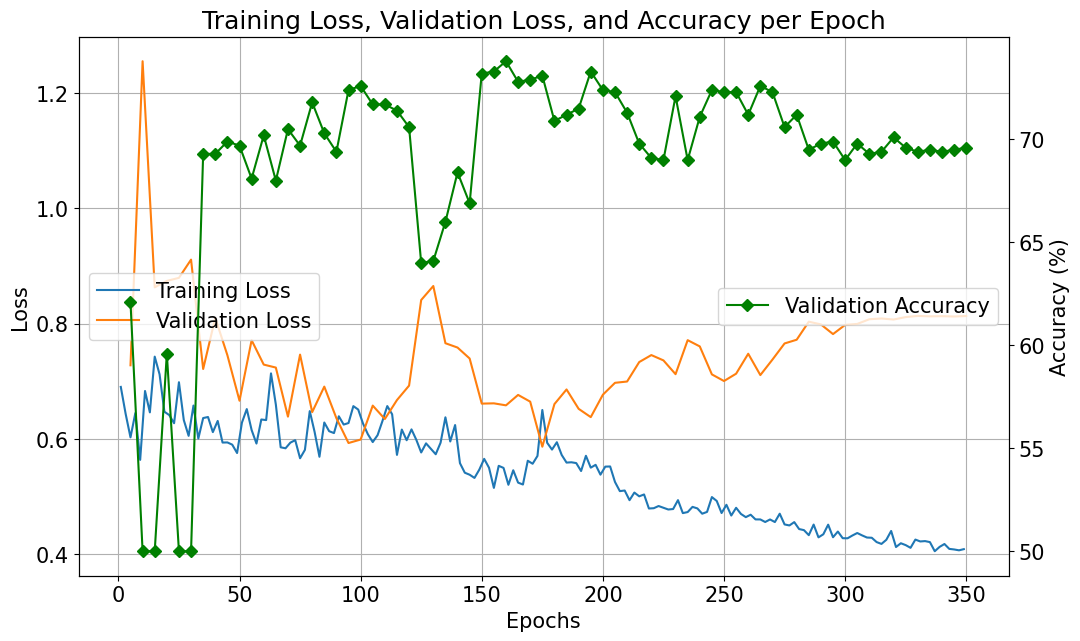

In [3]:
# Plot del grafico
fig, ax1 = plt.subplots(figsize=(12, 7))

# Asse sinistro per la loss
ax1.plot(train_epochs, train_losses, label='Training Loss') #, marker='o', linestyle='')
ax1.plot(val_epochs, val_losses, label='Validation Loss') #color='r', marker='s', 
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid(True)
ax1.legend(loc='center left')

# Asse destro per l'accuracy
ax2 = ax1.twinx()
ax2.plot(val_epochs, val_accs, color='g', marker='D', label='Validation Accuracy')
ax2.set_ylabel('Accuracy (%)')
ax2.legend(loc='center right')

plt.title('Training Loss, Validation Loss, and Accuracy per Epoch')
#plt.show()
plt.savefig("supervised_class.png")

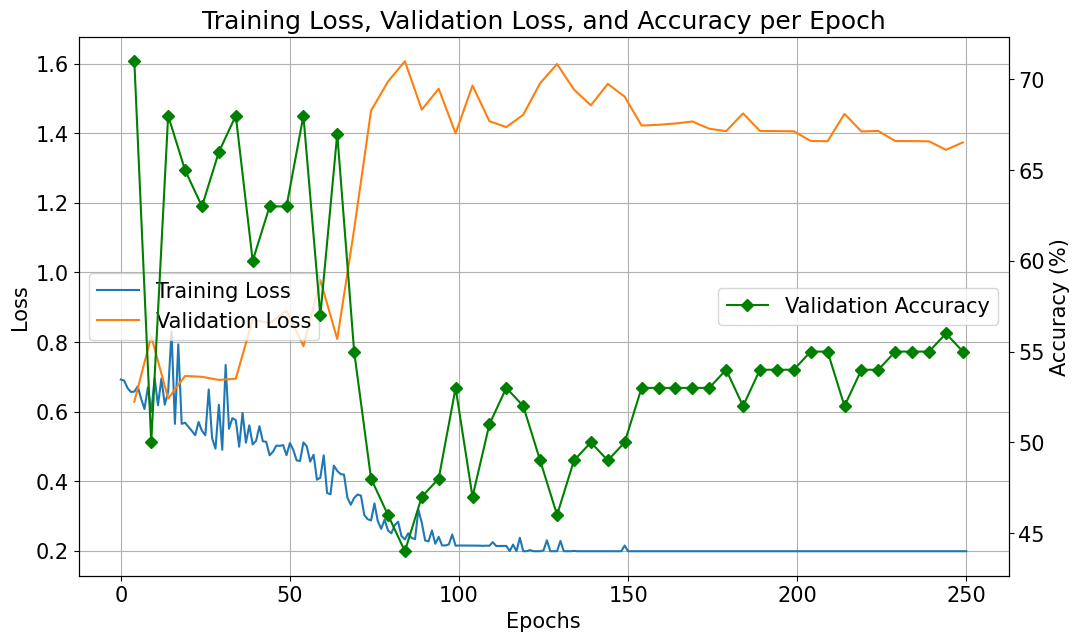

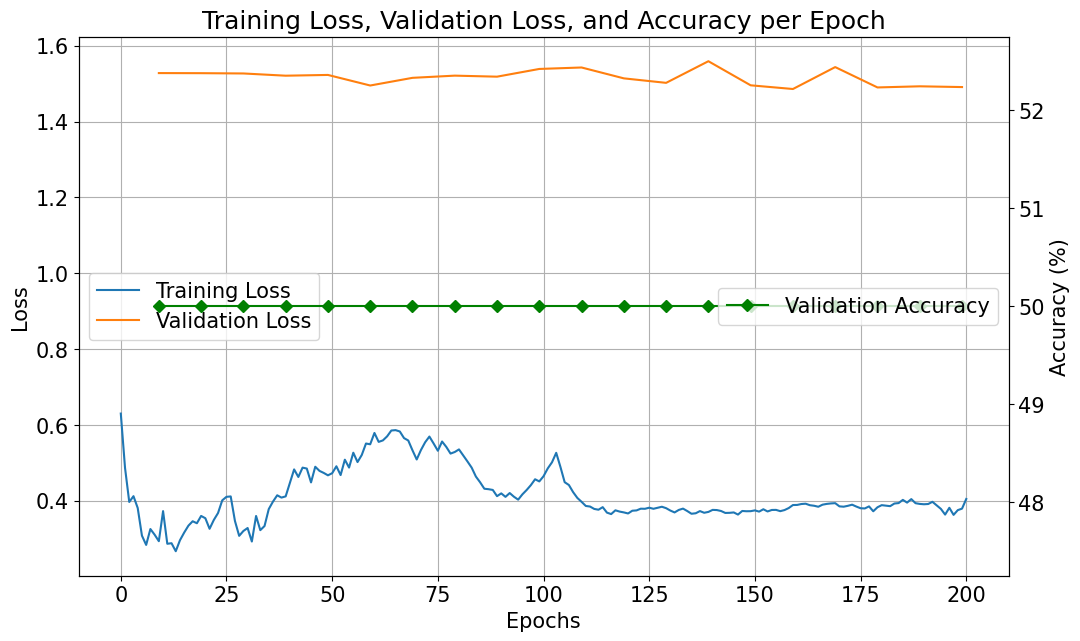

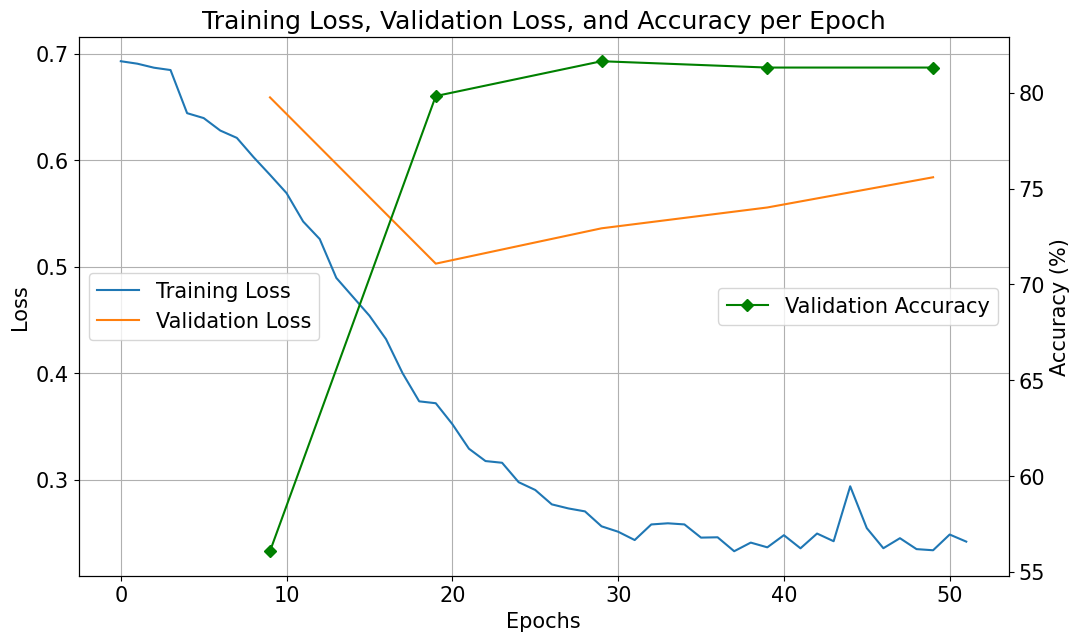

# Verifica training